## Лабораторная работа 2. Введение в машинное обучение.

![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: *Surname_Name_Group_NN.ipynb*, где *NN* — номер лабораторной работы. Например, *Kozlova_Anna_CS_02.ipynb*.

## Данные


В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать на следующих лекциях или, например, [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
%ls

data.adult.csv  lab.02.ipynb


In [3]:
df = pd.read_csv('./data.adult.csv', na_values='?')
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [4]:
print df.isnull().sum()
df.dropna(inplace=True)

age                 0
workclass         929
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        933
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
>50K,<=50K          0
dtype: int64


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

In [5]:
y_values = df['>50K,<=50K']
df.drop('>50K,<=50K', axis=1, inplace=True)
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40


In [6]:
y_values = y_values.apply({'>50K':1, '<=50K':0}.get).astype(float)

## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

In [7]:
X_train = df.ix[:,df.dtypes == int64]
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40


In [8]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import SGDClassifier as SGD
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import KFold

In [9]:
def plot_quality(grid_searcher, param_name, psevdo_index=None):
    means = []
    stds = []
    for elem in grid_searcher.grid_scores_:
        means.append(mean(elem.cv_validation_scores))
        stds.append(sqrt(var(elem.cv_validation_scores)))
    means = array(means)
    stds = array(stds)
    
    params = grid_searcher.param_grid
    
    figure(figsize=(8, 6))
    xparam = params[param_name] if psevdo_index == None else psevdo_index
    plot(xparam, means)
    fill_between(xparam, \
                 means + stds, means - stds, alpha = 0.3, facecolor='blue')
    xlabel(param_name)
    ylabel('AUC')

In [10]:
%time
gs_knn = GridSearchCV(KNN(), {'n_neighbors': arange(1,20,1)},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_knn.fit(X_train, y_values)
print gs_knn.best_params_
print gs_knn.best_score_

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs
{'n_neighbors': 4}
0.640716052871


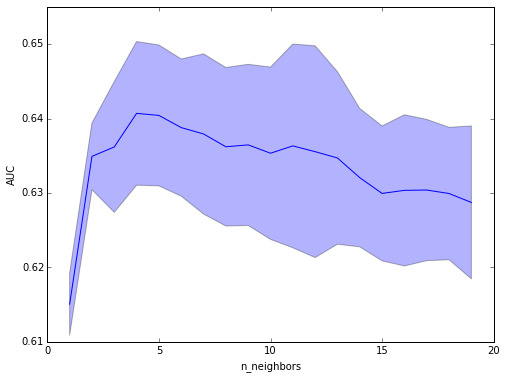

In [14]:
plot_quality(gs_knn, 'n_neighbors')

In [15]:
%time
gs_dt = GridSearchCV(DT(), {'max_depth': arange(3,25,1)},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_dt.fit(X_train, y_values)
print gs_dt.best_params_
print gs_dt.best_score_

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 31 µs
{'max_depth': 7}
0.841434627458


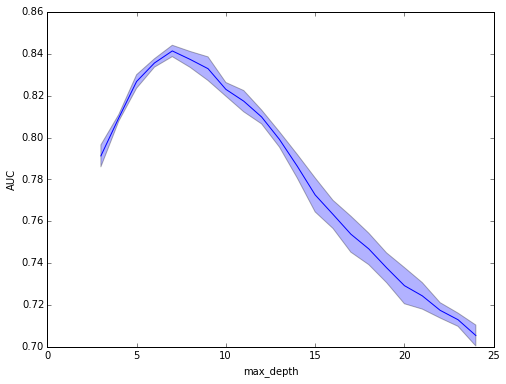

In [16]:
plot_quality(gs_dt, 'max_depth')

In [17]:
%time
gs_sgd = GridSearchCV(SGD(), {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_sgd.fit(X_train, y_values)
print gs_sgd.best_params_
print gs_sgd.best_score_

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.9 µs
{'loss': 'modified_huber'}
0.597383324303


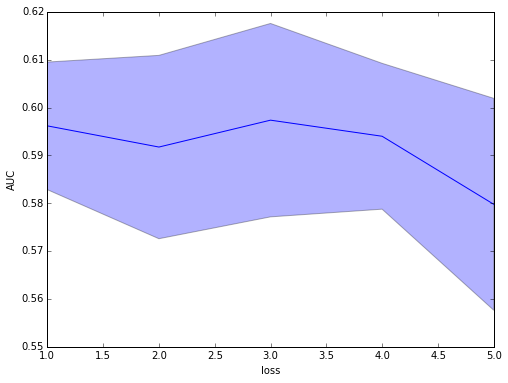

In [19]:
plot_quality(gs_sgd, 'loss', range(1,6))

Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

In [20]:
from sklearn.metrics import roc_auc_score

def get_auc_list(X, y, clf, print_score=True):
    predictions = list()
    scores = list()
    for i, tree in enumerate(clf.estimators_):
        predictions.append(tree.predict(X))
        rf_prediction = mean(predictions, axis=0)
        scores.append(roc_auc_score(y, rf_prediction))
    if print_score:
        print 'Last score', scores[-1]
    return scores

def plot_auc_graph(clf, X_train, X_test, y_train, y_test, prefix, print_train=True):
    clf.fit(X_train, y_train)
    train_aucs = get_auc_list(X_train, y_train, clf, print_train)
    test_aucs = get_auc_list(X_test, y_test, clf, True)
    if print_train:
        plot(train_aucs, label=prefix + ' train set')
    plot(test_aucs, label=prefix + ' test set')
    xlabel('n_estimators')
    ylabel('AUC')
    legend(loc=4)

Last score 0.826433573991
Last score 0.824757902521
Last score 0.82247235725
Last score 0.823718969943
Last score 0.799200629849
CPU times: user 32.6 s, sys: 1.35 s, total: 33.9 s
Wall time: 33.9 s


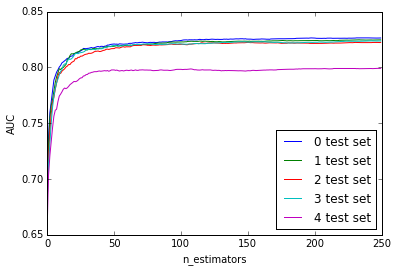

In [21]:
%%time
kf_total = KFold(X_train.shape[0], n_folds=5, shuffle=True)

i = 0
nEstimanors = 250
for train_index, test_index in kf_total:
    X = X_train.ix[train_index, :]
    X.dropna(inplace=True)
    y = y_values[X.index]
    Xt = X_train.ix[test_index, :].dropna()
    yt = y_values[Xt.index]
    plot_auc_graph(RF(n_estimators=nEstimanors), X, Xt, y, yt, str(i), False)
    i = i + 1

При n_estimators = 150 качество RandomForest стабилизировалось, поэтому в дальнейшем будем использовать это значение

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

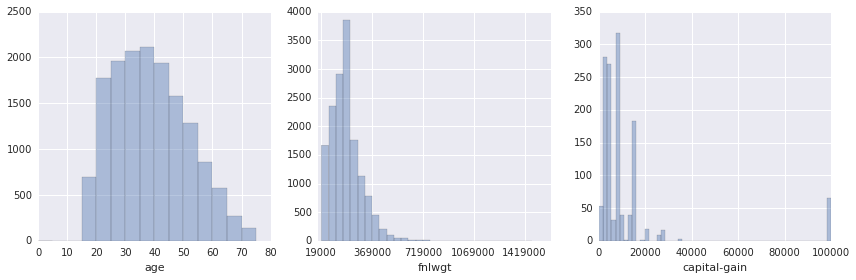

In [22]:
import seaborn as sns

f, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=False)
sns.despine(left=True)
sns.distplot(X_train.age, kde=False, bins=xrange(0, 80, 5), ax=axes[0])
ax = sns.distplot(X_train.fnlwgt, kde=False, bins=xrange(19302, 1484705, 50000), ax=axes[1])
ax.set_xticks(xrange(19000, 1500000, 350000))
sns.distplot(X_train.ix[X_train.ix[:,'capital-gain'] != 0, 'capital-gain'], 
             kde=False, ax=axes[2])

plt.tight_layout()

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

Данные не нормированы, значения признаков сильно отличаюбтся (значения fnlwgt на несколько порядков превышают значения Age). Из рассматриваемых алгоритмов это влияет kNN и SVGLinear. 

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

In [23]:
from sklearn import preprocessing

In [24]:
mm_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()

In [25]:
mm_scaler = mm_scaler.fit(X_train)
X_train_minmax = pd.DataFrame(mm_scaler.transform(X_train), columns=X_train.columns)

In [26]:
std_scaler = std_scaler.fit(X_train)
X_train_std = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns)

{'n_neighbors': 46}
0.834073049162
CPU times: user 1.38 s, sys: 540 ms, total: 1.92 s
Wall time: 36.7 s


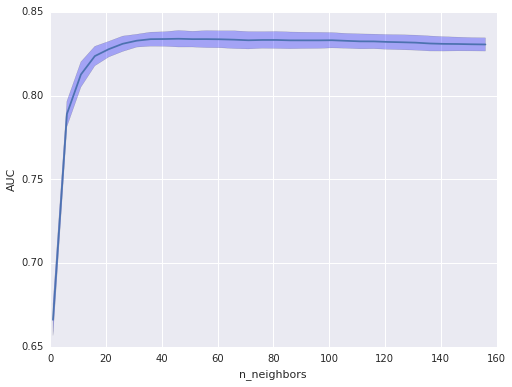

In [27]:
%%time
gs_knn = GridSearchCV(KNN(), {'n_neighbors': arange(1,160,5)},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_knn.fit(X_train_std, y_values)
print gs_knn.best_params_
print gs_knn.best_score_
plot_quality(gs_knn, 'n_neighbors')

{'max_depth': 7}
0.841811997507
CPU times: user 480 ms, sys: 264 ms, total: 744 ms
Wall time: 2.49 s


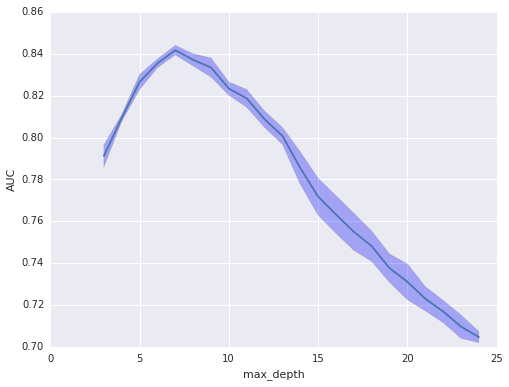

In [28]:
%%time
gs_dt = GridSearchCV(DT(), {'max_depth': arange(3,25,1)},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_dt.fit(X_train_std, y_values)
print gs_dt.best_params_
print gs_dt.best_score_
plot_quality(gs_dt, 'max_depth')

{'loss': 'log'}
0.80069886299
CPU times: user 268 ms, sys: 112 ms, total: 380 ms
Wall time: 1.94 s


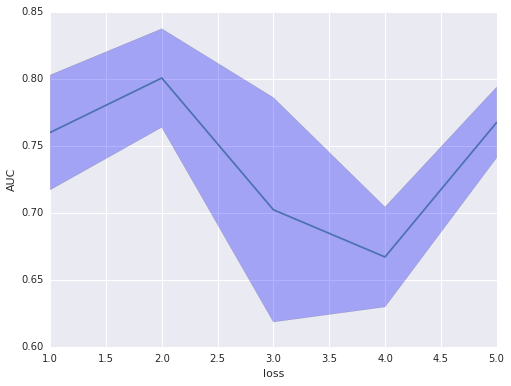

In [29]:
%%time
gs_sgd = GridSearchCV(SGD(), {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']},
                             cv=5, scoring='roc_auc', n_jobs=3)
gs_sgd.fit(X_train_std, y_values)
print gs_sgd.best_params_
print gs_sgd.best_score_
plot_quality(gs_sgd, 'loss', range(1,6))

Last score 0.815064671489
Last score 0.82012825429
Last score 0.831971478329
Last score 0.817658693734
Last score 0.813985821288
CPU times: user 33.1 s, sys: 64 ms, total: 33.2 s
Wall time: 33.2 s


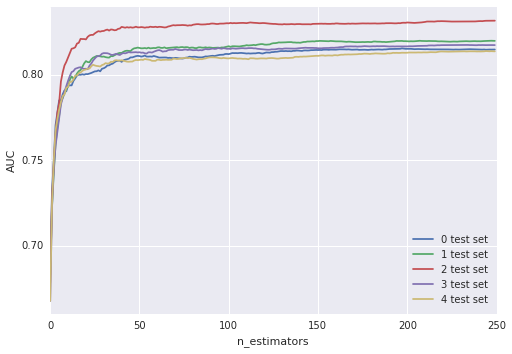

In [30]:
%%time
kf_total = KFold(X_train_std.shape[0], n_folds=5, shuffle=True)

i = 0
nEstimanors = 250
for train_index, test_index in kf_total:
    X = X_train.ix[train_index, :]
    X.dropna(inplace=True)
    y = y_values[X.index]
    Xt = X_train.ix[test_index, :].dropna()
    yt = y_values[Xt.index]
    plot_auc_graph(RF(n_estimators=nEstimanors), X, Xt, y, yt, str(i), False)
    i = i + 1

Изменилось ли качество у некоторых алгоритмов?

Как и ожидалось, качество классификаторов kNN и SGDLinear сильно выросло

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

In [31]:
%%time
gs_knn = GridSearchCV(KNN(), 
                      {'n_neighbors': arange(21,60,3),
                       'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
                      },
                      cv=5, scoring='roc_auc', n_jobs=3)
gs_knn.fit(X_train_std, y_values)
print gs_knn.best_params_
print gs_knn.best_score_
# gs_knn.grid_scores_

{'n_neighbors': 48, 'metric': 'manhattan'}
0.834349094069
CPU times: user 2.04 s, sys: 848 ms, total: 2.89 s
Wall time: 48.6 s


In [32]:
%%time
gs_dt = GridSearchCV(DT(), 
                     {'max_depth': arange(3,25,1),
                      'criterion': ['gini', 'entropy']},
                     cv=5, scoring='roc_auc', n_jobs=3)
gs_dt.fit(X_train_std, y_values)
print gs_dt.best_params_
print gs_dt.best_score_
# print gs_dt.grid_scores_

{'criterion': 'entropy', 'max_depth': 8}
0.842794819487
CPU times: user 732 ms, sys: 224 ms, total: 956 ms
Wall time: 5.45 s


In [33]:
%%time
gs_sgd = GridSearchCV(SGD(),
                      {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
                       'penalty': ['l2', 'l1', 'elasticnet'],
                      'l1_ratio': arange(0, 1, 0.05)},
                      cv=5, scoring='roc_auc', n_jobs=3)
gs_sgd.fit(X_train_std, y_values)
print gs_sgd.best_params_
print gs_sgd.best_score_
# print gs_sgd.grid_scores_

{'penalty': 'l2', 'l1_ratio': 0.10000000000000001, 'loss': 'log'}
0.817759086314
CPU times: user 6.12 s, sys: 1.26 s, total: 7.39 s
Wall time: 1min 18s


In [34]:
%%time
gs_rf = GridSearchCV(RF(n_estimators=150),
                      {'criterion': ['gini', 'entropy'],
                       'max_features': ['log2', 'sqrt', None],
                       'max_depth': np.append(arange(5,15,2), None)},
                      cv=5, scoring='roc_auc', n_jobs=3)
gs_rf.fit(X_train_std, y_values)
print gs_rf.best_params_
print gs_rf.best_score_
# print gs_rf.grid_scores_

{'max_features': 'log2', 'criterion': 'entropy', 'max_depth': 11}
0.856146274978
CPU times: user 4.35 s, sys: 576 ms, total: 4.92 s
Wall time: 3min 20s


Какой из алгоритмов имеет наилучшее качество? 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

Дерево решений имело наилучшее качество, что по-моему было весьма странно, т.к. рассматривался еще и случайный лес. После этого в сетку гиперпараметров для слуайного леса был добавлен параметр max_depth, и после этого качество случайного леса превысело качество дерева решений.

RandomForest обучался дольше всего т.к. при этом пришлось обучить 150 деревьев, сложность построения одного дерева nk*log(k), k - длина выборки, n - количество признаков.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [35]:
catDf = pd.DataFrame()
for col in df.ix[:,df.dtypes != int64].columns:
     catDf = pd.concat([pd.get_dummies(df[col]).rename(columns=lambda x: col + '_' + str(x)), catDf], axis=1)
catDf.head(10)

,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9,0,1,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
10,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к нормированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

In [36]:
X_all_features = pd.concat([X_train_std, catDf], axis=1).dropna()
y_values = y_values.ix[X_all_features.index]
X_all_features.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_Female,sex_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,...,education_Preschool,education_Prof-school,education_Some-college,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,-0.342919,0.900258,-0.450788,-0.065600,-0.21874,1.588223,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.114760,0.010683,-0.059086,-0.150439,-0.21874,-0.074178,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.190359,-0.106280,1.116020,-0.150439,-0.21874,-0.074178,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.21874,-0.905379,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.648719,-0.371197,1.116020,1.995391,-0.21874,-0.074178,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
from sklearn.cross_validation import cross_val_score

In [38]:
clf_knn = KNN(n_neighbors=48, metric='manhattan')
clf_dt  = DT(criterion='entropy', max_depth=8)
clf_sgd = SGD(penalty='l1', l1_ratio=0.65, loss='log')
clf_rf1 = RF(n_estimators=150, max_features='log2', criterion='entropy', max_depth=11)
clf_rf2 = RF(n_estimators=150, max_features='log2', criterion='entropy', max_depth=None)

In [39]:
%%time
knn_scores = cross_val_score(clf_knn, X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)
dt_scores  = cross_val_score(clf_dt,  X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)
sgd_scores = cross_val_score(clf_sgd, X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)
rf1_scores = cross_val_score(clf_rf1, X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)
rf2_scores = cross_val_score(clf_rf2, X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)

CPU times: user 504 ms, sys: 284 ms, total: 788 ms
Wall time: 22 s


In [40]:
dtToViz = pd.DataFrame(
            pd.DataFrame({
             'kNN': knn_scores,
             'DecisionTree': dt_scores,
             'SGDLinear': sgd_scores,
             'RF(max_depth=11)':  rf1_scores,
             'RF(max_depth=None)': rf2_scores
            }).stack()
          ).reset_index(level=[0, 1])
dtToViz.columns = ["cv", "Classifier", "score(AUC)"]

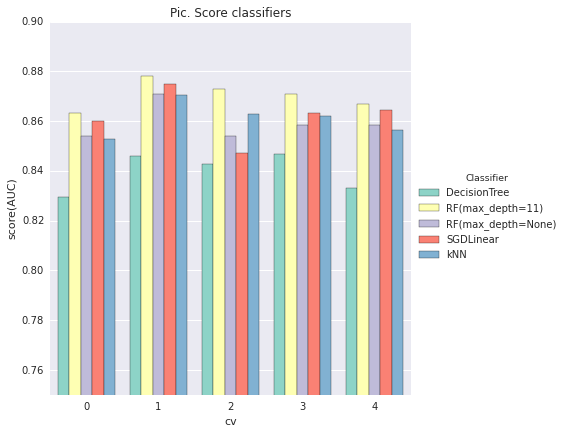

In [41]:
sns.factorplot(x="cv", y="score(AUC)", hue="Classifier", data=dtToViz,
                   size=6, kind="bar", palette="Set3")
sns.plt.ylim(0.75, 0.9)
sns.plt.title("Pic. Score classifiers");

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Как видно на графике выше, после добавления категориальных признаков лучший очень трудно выделить наилучший классификатор RandomForest, у которого ограничена максимальная глубина деревьев, за ним следует SGDLinear

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

In [42]:
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import SGDClassifier as SGD

class TwoModels(BaseEstimator, ClassifierMixin):  
    def __init__(self, alpha=0, clf1=RF(), clf2=SGD()):
        self.clf1 = clf1 
        self.clf2 = clf2 
        self.alpha = alpha


    def fit(self, X, y=None):
        self.clf1 = self.clf1.fit(X, y)
        self.clf2 = self.clf2.fit(X, y)
        return self

    
    def predict(self, X, y=None):
        p1 = self.predict_proba(X)
        return(np.argmax(self.predict_proba(X), axis=1))

    
    def predict_proba(self, X, y=None):
        p1 = self.clf1.predict_proba(X)
        p2 = self.clf2.predict_proba(X)
        return(self.alpha*p1 + (1-self.alpha)*p2)

In [43]:
%%time
clf_rf = RF(n_estimators=150, max_features='log2', criterion='entropy', max_depth=11)
clf_sgd = SGD(penalty='l1', l1_ratio=0.65, loss='log')

gs_models = GridSearchCV(TwoModels(clf1=clf_rf, clf2=clf_sgd), 
                      {'alpha': arange(0, 1, 0.04)},
                      cv=5, scoring='roc_auc', n_jobs=3)
gs_models.fit(X_all_features, y_values)
print gs_models.best_params_
print gs_models.best_score_

{'alpha': 0.40000000000000002}
0.874024629167
CPU times: user 3.4 s, sys: 148 ms, total: 3.54 s
Wall time: 1min 29s


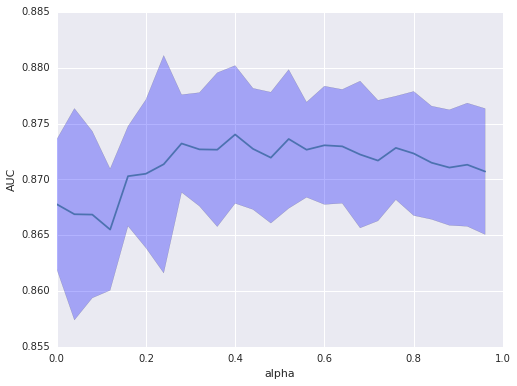

In [44]:
plot_quality(gs_models, 'alpha')

## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. На семинаре по визуализации вам было показано как строить "ящик с усами" (диаграмму размаха). Воспользуемся ей для сравнения алгоритмов между собой. 

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

In [45]:
m2_scores = cross_val_score(gs_models.best_estimator_, X_all_features, y_values, scoring='roc_auc', cv=5, n_jobs=5)

In [46]:
dtToViz = pd.DataFrame({
             'kNN': knn_scores,
             'DecisionTree': dt_scores,
             'SGDLinear': sgd_scores,
             'RF(depth=11)':  rf1_scores,
             'RF(depth=None)': rf2_scores,
             'a*RF+(1-a)SGD': m2_scores
            })

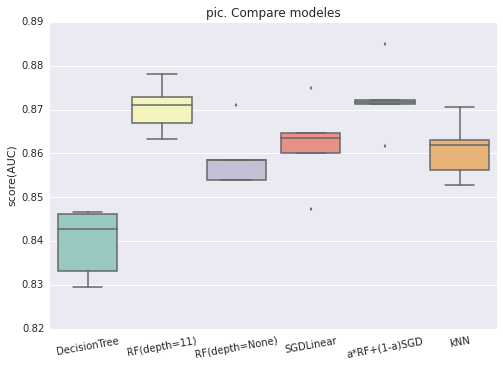

In [47]:
# старая версия seaborn...
g = sns.boxplot(groupby="Classifier", vals=dtToViz, color="Set3")
g.set_xticklabels(labels=dtToViz.columns, rotation=10)
sns.plt.ylabel("score(AUC)");
sns.plt.title('pic. Compare modeles');

Метод k-ближайших соседей. Имеет несколько гиперпараметров: количество соседей, метрика по которой расчитывается близость соседей, а так же веса объектов. Каждый из гиперпараметров влияет на результат. На качество данного классификатора сильно повлияла нормировка признаков (и в общем случае, для работы метода ближайших соседей, требуется нормировка признаков, хотя всё будет зависеть от используемой метрики) 

Решающее дерево. Рассматривались не все возможные гиперпараметры. Сильно на качество влияла глубина дерева, критейрий же определения качества разбиения влиял на качество в меньшей мере. Нормировка данных практически никак не сказалась на качестве.

Линейный классификатор. Так же как и в случае kNN нормировка признаков сильно сказалась на качестве. Функция потерь и вид регулизатора значительно влияет на качество классификации.

Случайный лес. Рассматривались несколько гиперпараметров, максимальное количество признаков используемых в деревьях леса, и критерий оценки качество разбиения. Данные параметры незначительно влияли на качество модели. Так же максимальная рассматривалась глубина деревьев в лесу. На данных, используемых в этой работе, этот параметр сильно влиял на качество модели. Так наилуйший результат дал лес с максимальной глубиной равно 11, однако такой лес обладал большим разбросом качества.